# Programming Assignment 4 - Linear versus Ridge Regression 

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc. 

 



In this notebook, you are to explore the effects of ridge regression.  We will use a dataset that is part of the sklearn.dataset package.  Learn more at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [204]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold

###  Importing the dataset

In [205]:
# Import the boston dataset from sklearn
boston_data = load_boston()

In [206]:
#  Create X and Y variables - X holding the design matrix and Y holding target vector
X_orig = boston_data.data 
y = boston_data.target

# Proprocesing by adding a column of 1's to the front of X_orig to create X
one_col = np.ones((X_orig.shape[0],1))
X = np.hstack((one_col, X_orig))

#  Reshape Y to be a rank 2 matrix 
y = y.reshape(X_orig.shape[0], 1)

# Observe the number of features and the number of labels
print('The number of features +1 (for the intercept) is: ', X.shape[1])
# Printing out the features
print('The features: ', boston_data.feature_names)
# The number of examples
print('The number of exampels in our dataset: ', X.shape[0])
#Observing the first 2 rows of the data
print(X[0:2])


The number of features +1 (for the intercept) is:  14
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
The number of exampels in our dataset:  506
[[1.0000e+00 6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01
  6.5750e+00 6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01
  3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01
  6.4210e+00 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01
  3.9690e+02 9.1400e+00]]


Since we will test linear and ridge regression on data with degree = 1 and data with degree = 2, we next create polynomial features of  degree 2 using the original dataset.  Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [207]:
# Create a PolynomialFeatures object with degree = 2. 
# Transform X and save it into X_2. Simply copy Y into Y_2 
# Note: PolynomialFeatures creates a column of ones as the first feature
poly = PolynomialFeatures(degree=2,include_bias = True) 
X_2 = poly.fit_transform(X_orig)
y_2 = y

In [208]:
# the shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively
print(X.shape)
print(X_2.shape)
print(y_2.shape)

(506, 14)
(506, 105)
(506, 1)


# Your code goes here

In [209]:
#linear regression
def linear_reg(X_train,y_train,alpha):
  psd_inverse = np.linalg.pinv(X_train)
  wlin = np.dot(psd_inverse, y_train)
  return wlin

In [210]:
# TODO - Define the get_coeff_ridge_normaleq function. 
# Use the normal equation method.
# TODO - Return w values

def get_coeff_ridge_normaleq(X_train, y_train, alpha):
    # use np.linalg.pinv(a)
    #### TO-DO #####
    Xt = np.transpose(X_train)
    #print(Xt.shape)
    #print(Xt.shape)
    #print(X_train.shape)
    XtX = np.dot(Xt,X_train)
    #print(XtX.shape)
    N = X_train.shape[0]
    I = np.identity(X_train.shape[1])
    
    I.itemset((0,0),0)
    #print(I)
    #print(I.shape)
    N_alpa_I = N*alpha*I
    part1 = np.linalg.inv(XtX+N_alpa_I)
    w = np.dot(np.dot(part1,Xt),y_train)
    ##############
    return w

In [211]:
# TODO - Define the evaluate_err_ridge function.
# TODO - Return the train_error and test_error values

def evaluate_err(X_train, X_test, y_train, y_test, w): 
    #### TO-DO #####
    y_train_hat =  np.dot(X_train,w)
    y_test_hat = np.dot(X_test,w)
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    temp_tr = np.power((y_train_hat-y_train),2)
    temp_ts = np.power((y_test_hat-y_test),2)
    MSE_tr = np.sum(temp_tr, axis=0)/n_train
    MSE_ts = np.sum(temp_ts, axis=0)/n_test
    ##############
    return MSE_tr, MSE_ts

In [212]:
# TODO - Finish writting the k_fold_cross_validation function. 
# TODO - Returns the average training error and average test error from the k-fold cross validation
# use Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold_cross_validation(k, X, y, alpha,regression_model):
    kf = KFold(n_splits=k, random_state=10, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    n = 0
    for train_index, test_index in kf.split(X):
        n=n+1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # scaling the data matrix (except for for the first column of ones)
        scaler = preprocessing.StandardScaler().fit(X_train[:,1:(X_train.shape[1]+1)])
        X_train[:,1:(X_train.shape[1]+1)] = scaler.transform(X_train[:,1:(X_train.shape[1]+1)])
        X_test[:,1:(X_train.shape[1]+1)] = scaler.transform(X_test[:,1:(X_train.shape[1]+1)])

        
        # determine the training error and the test error
        #### TO-DO #####
        print(n,"folds")
        w = regression_model(X_train,y_train,alpha)
        MSE_tr,MSE_ts = evaluate_err(X_train,X_test,y_train,y_test,w)
        print("train MSE",MSE_tr)
        print("validation MSE",MSE_ts)
        total_E_val_test = total_E_val_test+MSE_ts
        total_E_val_train = total_E_val_train +MSE_tr
    E_val_test = total_E_val_test/k
    E_val_train = total_E_val_train/k
       ##############
    return  E_val_test, E_val_train
    


In [213]:
alpha = np.logspace(-5, 1, num=15)
print(alpha)

[1.00000000e-05 2.68269580e-05 7.19685673e-05 1.93069773e-04
 5.17947468e-04 1.38949549e-03 3.72759372e-03 1.00000000e-02
 2.68269580e-02 7.19685673e-02 1.93069773e-01 5.17947468e-01
 1.38949549e+00 3.72759372e+00 1.00000000e+01]


linear regression with X and X_2

In [214]:
#linear regression
# x,y
E_val_test,E_val_train = k_fold_cross_validation(3,X,y,0,linear_reg)
print("avarage MSE of test",E_val_train)
print("avarage MSE of test",E_val_test)
# x_2,y_2
print(" creating a polynomial transformation")
E_val_test,E_val_train = k_fold_cross_validation(3,X_2,y_2,0,linear_reg)
print("avarage MSE of train",E_val_train)
print("avarage MSE of test",E_val_test)

1 folds
train MSE [20.17653041]
validation MSE [26.94958751]
2 folds
train MSE [22.33224469]
validation MSE [22.7337]
3 folds
train MSE [21.96992282]
validation MSE [22.32462086]
avarage MSE of test [21.4928993]
avarage MSE of test [24.00263612]
 creating a polynomial transformation
1 folds
train MSE [5.34590153]
validation MSE [12.34962204]
2 folds
train MSE [5.93695452]
validation MSE [11.87848315]
3 folds
train MSE [3.93532048]
validation MSE [19.56397323]
avarage MSE of train [5.07272551]
avarage MSE of test [14.59735947]


ridge regression with x and x_2

In [215]:
#ridge regression for x,y
for a in alpha:
  print("alpha=",a)
  E_val_test,E_val_train = k_fold_cross_validation(3,X,y,a,get_coeff_ridge_normaleq)
  print("avarage MSE of train",E_val_train)
  print("avarage MSE of test",E_val_test)

alpha= 1e-05
1 folds
train MSE [20.17653044]
validation MSE [26.9494752]
2 folds
train MSE [22.33224472]
validation MSE [22.73357472]
3 folds
train MSE [21.96992285]
validation MSE [22.32449699]
avarage MSE of train [21.49289933]
avarage MSE of test [24.00251564]
alpha= 2.6826957952797274e-05
1 folds
train MSE [20.17653061]
validation MSE [26.94928636]
2 folds
train MSE [22.33224489]
validation MSE [22.73336408]
3 folds
train MSE [21.96992305]
validation MSE [22.32428881]
avarage MSE of train [21.49289952]
avarage MSE of test [24.00231308]
alpha= 7.196856730011514e-05
1 folds
train MSE [20.17653189]
validation MSE [26.94878067]
2 folds
train MSE [22.33224614]
validation MSE [22.73279997]
3 folds
train MSE [21.96992444]
validation MSE [22.32373195]
avarage MSE of train [21.49290083]
avarage MSE of test [24.00177086]
alpha= 0.00019306977288832496
1 folds
train MSE [20.17654108]
validation MSE [26.94743065]
2 folds
train MSE [22.33225512]
validation MSE [22.73129366]
3 folds
train MSE [21

In [216]:
#ridge regression for X_2,y_2
E_test=[]
E_train=[]
for a in alpha:
  print("alpha=",a)
  E_val_test,E_val_train = k_fold_cross_validation(3,X_2,y_2,a,get_coeff_ridge_normaleq)
  print("avarage MSE of test",E_val_train)
  print("avarage MSE of test",E_val_test)
  E_test.append(E_val_test)
  E_train.append(E_val_train)

alpha= 1e-05
1 folds
train MSE [5.39208602]
validation MSE [12.24073343]
2 folds
train MSE [5.986366]
validation MSE [11.44422058]
3 folds
train MSE [3.99797872]
validation MSE [17.34791157]
avarage MSE of test [5.12547691]
avarage MSE of test [13.67762186]
alpha= 2.6826957952797274e-05
1 folds
train MSE [5.46019444]
validation MSE [12.15387609]
2 folds
train MSE [6.0475875]
validation MSE [11.19066572]
3 folds
train MSE [4.06333095]
validation MSE [16.56781799]
avarage MSE of test [5.19037096]
avarage MSE of test [13.30411993]
alpha= 7.196856730011514e-05
1 folds
train MSE [5.60492139]
validation MSE [12.09264754]
2 folds
train MSE [6.17604732]
validation MSE [10.93600132]
3 folds
train MSE [4.18151193]
validation MSE [16.09057591]
avarage MSE of test [5.32082688]
avarage MSE of test [13.03974159]
alpha= 0.00019306977288832496
1 folds
train MSE [5.87002822]
validation MSE [12.03862141]
2 folds
train MSE [6.40551953]
validation MSE [10.74345732]
3 folds
train MSE [4.38654182]
validatio

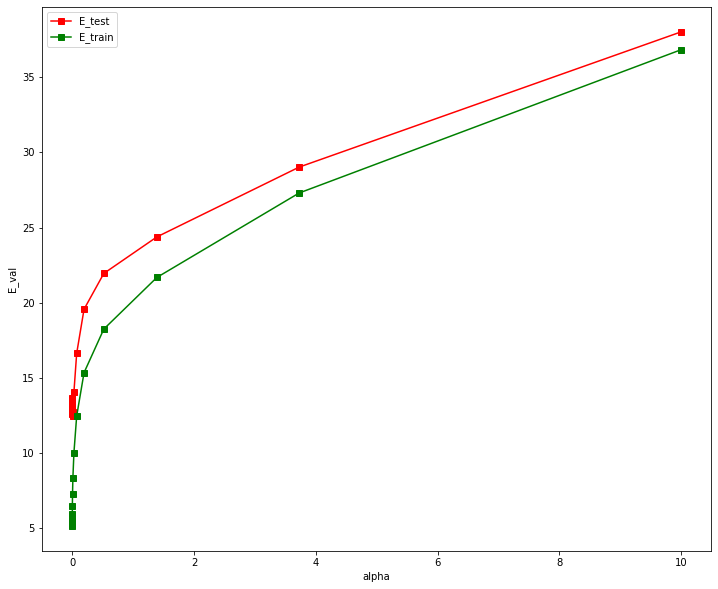

In [217]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
x = alpha
plt.plot(x,E_test,'s-',color = 'r',label="E_test")
plt.plot(x,E_train,'s-',color = 'g',label="E_train")
plt.xlabel("alpha")
plt.ylabel("E_val")
plt.legend()
plt.show()

###experiment

In [218]:
poly = PolynomialFeatures(degree=3,include_bias = True) 
X_3 = poly.fit_transform(X_orig)
y_3 = y
E_val_test,E_val_train = k_fold_cross_validation(3,X_3,y_3,25,get_coeff_ridge_normaleq)
print("avarage MSE of train",E_val_train)
print("avarage MSE of test",E_val_test)

1 folds
train MSE [30.81786627]
validation MSE [40.22102252]
2 folds
train MSE [33.49343836]
validation MSE [30.53616379]
3 folds
train MSE [32.01528506]
validation MSE [32.20253892]
avarage MSE of train [32.10886323]
avarage MSE of test [34.31990841]


In [219]:
for a in alpha:
  print("alpha=",a)
  E_val_test,E_val_train = k_fold_cross_validation(3,X_3,y_3,a,get_coeff_ridge_normaleq)
  print("avarage MSE of test",E_val_train)
  print("avarage MSE of test",E_val_test)
  E_test.append(E_val_test)
  E_train.append(E_val_train)

alpha= 1e-05
1 folds
train MSE [0.71537819]
validation MSE [99.97767571]
2 folds
train MSE [0.99067318]
validation MSE [129.59584886]
3 folds
train MSE [0.7554781]
validation MSE [56.19508925]
avarage MSE of test [0.82050982]
avarage MSE of test [95.25620461]
alpha= 2.6826957952797274e-05
1 folds
train MSE [0.94928934]
validation MSE [70.7000401]
2 folds
train MSE [1.35807964]
validation MSE [64.11843252]
3 folds
train MSE [1.00077054]
validation MSE [38.36143574]
avarage MSE of test [1.10271317]
avarage MSE of test [57.72663612]
alpha= 7.196856730011514e-05
1 folds
train MSE [1.27172111]
validation MSE [44.32856162]
2 folds
train MSE [1.83659379]
validation MSE [35.82178173]
3 folds
train MSE [1.29133685]
validation MSE [29.13196056]
avarage MSE of test [1.46655058]
avarage MSE of test [36.42743464]
alpha= 0.00019306977288832496
1 folds
train MSE [1.70391688]
validation MSE [26.9737708]
2 folds
train MSE [2.38964599]
validation MSE [21.58799017]
3 folds
train MSE [1.62749772]
validati

predict the average price of a house

In [220]:
predict_X=[ 0.1, 11, 7, 0, 0.4, 6, 70, 4, 6, 300, 16, 360, 10]
predict_X = np.asarray(predict_X)
predict_X = predict_X.reshape(1,13)

poly = PolynomialFeatures(degree=2,include_bias = True) 
predict_X_2 = poly.fit_transform(predict_X)
#print(predict_X_2)

scaler = preprocessing.StandardScaler().fit(X_2[:,1:(X_2.shape[1]+1)])
X_2[:,1:(X_2.shape[1]+1)] =  scaler.transform(X_2[:,1:(X_2.shape[1]+1)])
predict_X_2[:,1:(X_2.shape[1]+1)] =  scaler.transform(predict_X_2[:,1:(X_2.shape[1]+1)])

w_2 = get_coeff_ridge_normaleq(X_2,y_2,0.01)
predict_y = np.dot(predict_X_2,w_2)
print(predict_y)


[[24.67886008]]
